In [29]:
import pandas as pd
import numpy as np
import os

In [30]:
path='data_challenge.csv'
df = pd.read_csv(path)                
df.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [38]:
print(df.describe())

          order_id      shop_id      user_id   order_amount  total_items  \
count  5000.000000  5000.000000  5000.000000    5000.000000   5000.00000   
mean   2500.500000    50.078800   849.092400    3145.128000      8.78720   
std    1443.520003    29.006118    87.798982   41282.539349    116.32032   
min       1.000000     1.000000   607.000000      90.000000      1.00000   
25%    1250.750000    24.000000   775.000000     163.000000      1.00000   
50%    2500.500000    50.000000   849.000000     284.000000      2.00000   
75%    3750.250000    75.000000   925.000000     390.000000      3.00000   
max    5000.000000   100.000000   999.000000  704000.000000   2000.00000   

         value_item  
count   5000.000000  
mean     387.742800  
std     2441.963725  
min       90.000000  
25%      133.000000  
50%      153.000000  
75%      169.000000  
max    25725.000000  


In [32]:
df.replace(np.nan, 0)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [40]:
unique_amounts = df.groupby(['order_amount']).size().reset_index(name='count').sort_values(by='order_amount', ascending=False)
unique_amounts.head()

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16


In [41]:
df.loc[df['order_amount'].isin([704000, 51450, 25725])].sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,value_item
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0


<AxesSubplot:>

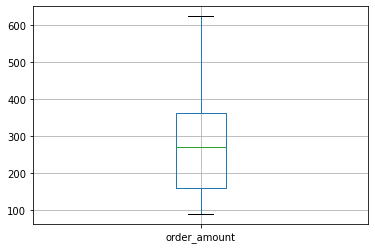

In [46]:
q1 = df.order_amount.quantile(q=0.25)
q2 = df.order_amount.quantile(q=0.5)
q3 = df.order_amount.quantile(q=0.75)
IQR = q3 - q1

df_truncated = df[(df.order_amount < q2 + IQR * 1.5) & (df.order_amount > q2 - IQR * 1.5)]
df_truncated.boxplot(column='order_amount')

In [47]:
df_truncated.order_amount.describe()

count    4738.000000
mean      283.814268
std       132.061996
min        90.000000
25%       161.000000
50%       272.000000
75%       362.000000
max       624.000000
Name: order_amount, dtype: float64

In [48]:
#What metric would you report for this dataset?
#It looks like the data have many outliers, so using the medium value would be a better metric in this case
#What is its value?
#using describe() of the truncated value the medium value is 283.8